In [1]:
'''text = ''

for a_file in os.listdir(directory):
    if a_file.endswith('.pdf'):
        file_path = directory + '/' + str(a_file)
        with open(file_path, 'rb') as pdf:
            pages = PyPDF2.PdfFileReader(pdf)
            count = pages.numPages
            print(count)
            output = []
        for i in range(count):
            page = pages.getPage(i)
            output.append(page.extractText())
        pdf.close()
        print(output)'''

"text = ''\n\nfor a_file in os.listdir(directory):\n    if a_file.endswith('.pdf'):\n        file_path = directory + '/' + str(a_file)\n        with open(file_path, 'rb') as pdf:\n            pages = PyPDF2.PdfFileReader(pdf)\n            count = pages.numPages\n            print(count)\n            output = []\n        for i in range(count):\n            page = pages.getPage(i)\n            output.append(page.extractText())\n        pdf.close()\n        print(output)"

In [2]:
import os
import docx2txt
import PyPDF2
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
np.random.seed(0) 

In [3]:
directory = 'C:/Users/arund/OneDrive/Desktop/NLP/Project/Data/Resumes'
extension = '.docx'
text = ''
resume_dict = {}
for a_file in os.listdir(directory):
    content = []
    if a_file.endswith('.docx'):
        text = docx2txt.process(directory + '/' + str(a_file))
        #print(text, '\n\n------------------------------------------------------------------------------------------\n\n')
        resume_dict[str(a_file[:-5])] = text

In [4]:
resume_data = pd.DataFrame.from_dict(resume_dict, orient  = 'index', columns = ['Resume'])
resume_data.index.name = 'Names'
resume_data.head()

,Resume
Names,
ABHAY RAJ DWIVEDI,ABHAY RAJ DWIVEDIFeatured Resume \n\n \n\nSof...
Abhishek Sharma,Abhishek SharmaFeatured Resume \n\n \n\nDevel...
ADRYJA GHOSH,ADRYJA GHOSHFeatured Resume \n\n \n\nEnglish ...
AJAY CHINNI,AJAY CHINNIFeatured Resume \n\n \n\nSeeking r...
ALANKRIT NIRJHAR,ALANKRIT NIRJHARPremium CV Featured Resume \n...


In [5]:
directory = 'C:/Users/arund/OneDrive/Desktop/NLP/Project/Data/JobDesc'
extension = '.docx'
text = ''
job_desc_dict = {}
for a_file in os.listdir(directory):
    content = []
    if a_file.endswith('.docx'):
        text = docx2txt.process(directory + '/' + str(a_file))
        #print(text, '\n\n------------------------------------------------------------------------------------------\n\n')
        job_desc_dict[str(a_file[:-5])] = text

In [6]:
job_desc_data = pd.DataFrame.from_dict(job_desc_dict, orient  = 'index', columns = ['Job_Description'])
job_desc_data.index.name = 'Profile'
job_desc_data.head()

,Job_Description
Profile,
Backend Developer,Backend Developer - Python/Django\n\n\n\nWe ar...
Billing cum Logistics Manager,Billing cum Logistics Manager\n\nJob Summary\n...
Data Scientist,Data Scientist/ ML Engineer\n\nGame Change Sol...
Director of Engineering,"Director of Engineering, Google CloudDirector ..."
Global Industry Content Manager,Global Industry Content Manager\n\nMinimum qua...


## NLTK

In [7]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

## Cleaning Data

In [8]:
from string import punctuation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
import nltk.stem
from nltk.stem import LancasterStemmer, SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import re
from string import punctuation

In [9]:
'''Checks for punctuations and stopwords, converts to lower case, performs tokenization, POS tagging and lemmatization and 
also removes irrelevant data''' 

def clean_data(text): 
    stop_words = stopwords.words('english')
    tokens = word_tokenize(text)
    cleaned_tokens = []

    for tok, tag in pos_tag(tokens):
        tok = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+#]|[!*\(\)]|'\
                       '(?:%[0-9a-fA-F][0-9a-fA-F]))+','', tok)
        tok = re.sub("(@[A-Za-z0-9_]+)","", tok)

        if tag.startswith("NN"):
            pos = 'n'
        elif tag.startswith('VB'):
            pos = 'v'
        else:
            pos = 'a'

        lemmatizer = WordNetLemmatizer()
        tok = lemmatizer.lemmatize(tok, pos)

        if len(tok) > 0 and tok not in punctuation and tok.lower() not in stop_words:
            cleaned_tokens.append(tok.lower())
    return cleaned_tokens

In [10]:
resume_data['Clean_data'] = resume_data['Resume'].apply(lambda x:clean_data(x))
resume_data.sample(5)

,Resume,Clean_data
Names,,
MADHU H,MADHU H.KPremium CV Featured Resume \n\n \n\n...,"[madhu, h.kpremium, cv, featured, resume, seni..."
Manvi Singh,Manvi SinghFeatured Resume \n\n \n\nHR Manage...,"[manvi, singhfeatured, resume, hr, manager, se..."
MONICA CHOPRA,MONICA CHOPRAFeatured Resume \n\n \n\nForeign...,"[monica, choprafeatured, resume, foreign, engl..."
RISHABH SHARMA,RISHABH SHARMAFeatured Resume \n\n \n\nJunior...,"[rishabh, sharmafeatured, resume, junior, mana..."
Seshadri Sastry Kunapuli,Seshadri Sastry Kunapuli \n\n \n\nManager ...,"[seshadri, sastry, kunapuli, manager, technolo..."


In [11]:
job_desc_data['Clean_data'] = job_desc_data['Job_Description'].apply(lambda x:clean_data(x))
job_desc_data.sample(5)

,Job_Description,Clean_data
Profile,,
Senior Software Developer,Senior Software Developer\n\nSenior Software E...,"[senior, software, developer, senior, software..."
Web_dev_job,The position holder will be responsible for cr...,"[position, holder, responsible, creation, impl..."
Director of Engineering,"Director of Engineering, Google CloudDirector ...","[director, engineering, google, clouddirector,..."
Lead Technical Program Manager,"Lead Technical Program Manager, Site Reliabili...","[lead, technical, program, manager, site, reli..."
Backend Developer,Backend Developer - Python/Django\n\n\n\nWe ar...,"[backend, developer, python/django, look, pyth..."


In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer


def do_tfidf(token):
    tfidf = TfidfVectorizer(max_df=0.05, min_df=0.002)
    words = tfidf.fit_transform(token)
    sentence = " ".join(tfidf.get_feature_names())
    return sentence

In [13]:
resume_data['TF_IDF_Based'] = resume_data['Clean_data'].apply(lambda x: do_tfidf(x))
resume_data.sample(5)

,Resume,Clean_data,TF_IDF_Based
Names,,,
Dileep Matha,Dileep MathaFeatured Resume \n\n \n\nSoftware...,"[dileep, mathafeatured, resume, software, deve...",16 20 2019 20last active algorithms api area b...
Vivek Kumar,Vivek KumarFeatured Resume \n\n \n\n(Immediat...,"[vivek, kumarfeatured, resume, immediate, join...",15 20 2014 2017 2020 20last 405e95ab50f4878852...
Ashish Singh,Ashish Singh ThakurFeatured Resume \n\n \n\nH...,"[ashish, singh, thakurfeatured, resume, hr, ma...",10th 17 20 2010 2013 2014 2015 2018 20last 615...
Manvi Singh,Manvi SinghFeatured Resume \n\n \n\nHR Manage...,"[manvi, singhfeatured, resume, hr, manager, se...",18 2015 2017 acquisition across action apmosys...
RAJINDER KUMAR,RAJINDER KUMARFeatured Resume \n\n \n\nSales ...,"[rajinder, kumarfeatured, resume, sales, marke...",16 2009 2012 account achieve activity analyze ...


In [14]:
job_desc_data['TF_IDF_Based'] = job_desc_data['Clean_data'].apply(lambda x: do_tfidf(x))
job_desc_data.sample(5)

,Job_Description,Clean_data,TF_IDF_Based
Profile,,,
Lead Technical Program Manager,"Lead Technical Program Manager, Site Reliabili...","[lead, technical, program, manager, site, reli...",ability able across also analysis apart archit...
Senior Product Manager,"Senior Product Manager, Hardware Enablement, C...","[senior, product, manager, hardware, enablemen...",able accelerate accessible across addition ado...
Backend Developer,Backend Developer - Python/Django\n\n\n\nWe ar...,"[backend, developer, python/django, look, pyth...",00 000 19 35 55 ability able additional aesthe...
HTML Developer,HTML Developer\n\nSlidesigma India LLC is a we...,"[html, developer, slidesigma, india, llc, web,...",00 000 10 12 17 19 active bachelor base basic ...
Primary English Teacher,Primary English Teacher\n\nPosition Title: Fac...,"[primary, english, teacher, position, title, f...",000 10 110 11k 12 1500 17k 20 200 45 50 60 abi...


## Similarity

In [15]:
job_desc_data.index

Index(['Backend Developer', 'Billing cum Logistics Manager', 'Data Scientist',
       'Director of Engineering', 'Global Industry Content Manager',
       'HTML Developer', 'IT Project Manager',
       'Lead Technical Program Manager', 'Primary English Teacher',
       'Revenue Reporting Data Analyst', 'Senior Product Manager',
       'Senior Software Developer', 'Web Developer', 'Web_dev_job'],
      dtype='object', name='Profile')

In [16]:
import textdistance as td


def match(resume, job_des):
    j = td.jaccard.similarity(resume, job_des)
    s = td.sorensen_dice.similarity(resume, job_des)
    c = td.cosine.similarity(resume, job_des)
    o = td.overlap.normalized_similarity(resume, job_des)
    total = (j+s+c+o)/4
    # total = (s+o)/2
    return total*100

In [17]:
for i in job_desc_data.index:
    resume_data[str(i)] = resume_data['TF_IDF_Based'].apply(lambda x:match(x, job_desc_data.TF_IDF_Based[i])) 

In [18]:
desc = input()

HTML Developer


In [19]:
sorted_resume = resume_data.sort_values(
    by=[desc], ascending=False)

In [20]:
sorted_resume[[desc]][:10]

,HTML Developer
Names,
Charu Tyagi,81.208075
MADHU H,79.823867
Seshadri Sastry Kunapuli,79.042605
Amarpreet Singh,78.377193
RAHUL GOEL,75.976129
Sumith Chandru,75.774793
Avik Bhattacharya,75.655270
RAJINDER KUMAR,75.628854
khyati gandhi,74.919734


In [21]:
resume_data.columns

Index(['Resume', 'Clean_data', 'TF_IDF_Based', 'Backend Developer',
       'Billing cum Logistics Manager', 'Data Scientist',
       'Director of Engineering', 'Global Industry Content Manager',
       'HTML Developer', 'IT Project Manager',
       'Lead Technical Program Manager', 'Primary English Teacher',
       'Revenue Reporting Data Analyst', 'Senior Product Manager',
       'Senior Software Developer', 'Web Developer', 'Web_dev_job'],
      dtype='object')

In [22]:
skills = resume_data.drop(['Resume', 'Clean_data', 'TF_IDF_Based'], axis = 1).T
skills

Names,ABHAY RAJ DWIVEDI,Abhishek Sharma,ADRYJA GHOSH,AJAY CHINNI,ALANKRIT NIRJHAR,Amarpreet Singh,AMITABHA,Arun Kumar,Ashish Singh,Ashwani Kumar Rajput,...,Shambhai Mishra,Shiraz Siddiqui,SNEHA SAHU,Sneha Vijay Bhamkar,Sumith Chandru,Suraj Chauhan,Swati Mehta,Vikram Balasubramanian,Vipin Kumar,Vivek Kumar
Backend Developer,91.808275,78.462243,79.464153,92.830023,87.620437,68.931842,89.374077,71.966844,82.715256,92.045660,...,77.668840,80.789944,85.730357,73.586751,70.144355,86.781835,86.216339,81.959834,88.633606,81.597763
Billing cum Logistics Manager,52.963254,64.356747,63.548984,52.085917,49.952815,74.687289,56.323059,72.119245,47.260918,55.130433,...,65.450841,62.615643,60.569705,68.066187,73.402085,59.319426,48.688322,62.944512,50.522009,62.522909
Data Scientist,88.713912,83.485779,84.048673,86.750130,82.059982,73.778373,90.037801,77.378582,76.590701,90.911958,...,83.645779,87.853110,91.244488,78.513559,75.453384,90.822801,79.819858,88.140054,83.366163,87.175562
Director of Engineering,86.273564,84.059167,83.982949,85.122642,80.402078,75.014790,90.053975,79.375238,75.222154,90.169083,...,84.101653,87.803525,91.611306,79.503001,76.741101,88.243818,78.243578,88.856120,81.889259,86.924650
Global Industry Content Manager,90.866879,79.208679,80.545532,90.568713,84.830738,70.401637,87.778221,74.713170,79.865424,90.008941,...,79.239783,83.001035,88.464913,74.546800,71.991383,87.479177,81.952557,84.402255,85.246642,82.370599
HTML Developer,56.421965,69.129048,68.230764,55.439747,52.937926,78.377193,60.206251,74.236103,50.027209,58.845739,...,70.064802,66.606555,64.352735,73.250130,75.774793,63.384361,51.630340,67.263333,53.574680,66.650566
IT Project Manager,81.121683,85.054837,86.451451,80.454567,76.188317,79.208725,87.247506,84.311928,70.845874,84.827329,...,87.581433,88.453359,91.877098,82.229869,80.494252,88.419643,73.617427,88.527668,77.383895,86.916395
Lead Technical Program Manager,91.021956,76.502368,77.837723,92.994845,87.912540,67.470880,87.207358,71.435589,83.203328,89.289690,...,76.033522,79.486728,84.619631,71.531784,68.967280,84.568926,85.574345,80.469783,88.349369,79.139476
Primary English Teacher,91.272923,79.828249,81.097585,90.584660,87.278374,70.012993,90.389318,72.701290,81.537548,90.836233,...,79.296866,81.843476,87.359934,74.989563,71.044443,88.169004,84.911306,83.376515,87.162449,82.495612
Revenue Reporting Data Analyst,87.398598,81.703855,83.894894,86.286111,81.762181,73.466637,88.394210,78.410684,75.764502,88.366493,...,82.484385,86.341782,91.107239,77.249086,74.957376,86.730898,78.751615,87.842182,82.503067,85.574135


In [23]:
roles = [i for i in skills.index]
roles

['Backend Developer',
 'Billing cum Logistics Manager',
 'Data Scientist',
 'Director of Engineering',
 'Global Industry Content Manager',
 'HTML Developer',
 'IT Project Manager',
 'Lead Technical Program Manager',
 'Primary English Teacher',
 'Revenue Reporting Data Analyst',
 'Senior Product Manager',
 'Senior Software Developer',
 'Web Developer',
 'Web_dev_job']

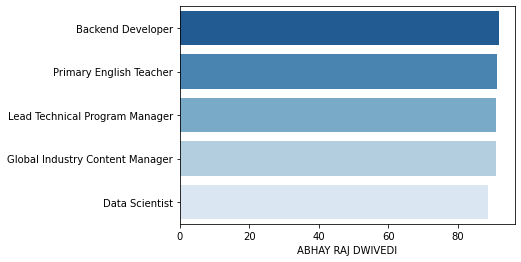

In [24]:
sns.barplot(x=skills['ABHAY RAJ DWIVEDI'], y=roles, palette='Blues_r', order=skills.sort_values('ABHAY RAJ DWIVEDI', ascending=False)[:5].index)
plt.show()

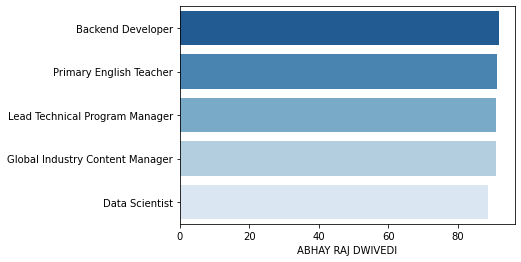

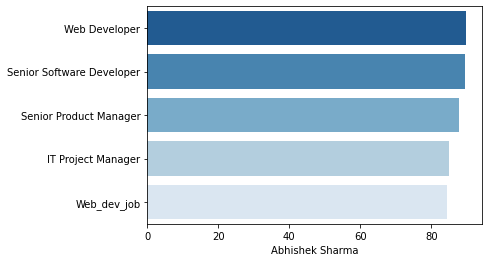

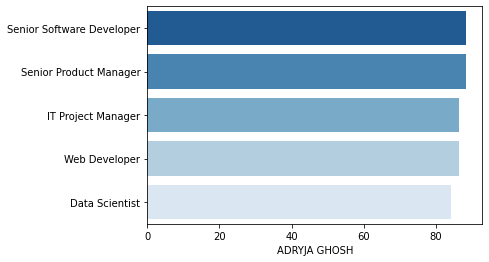

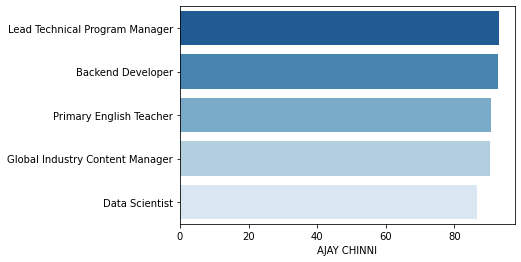

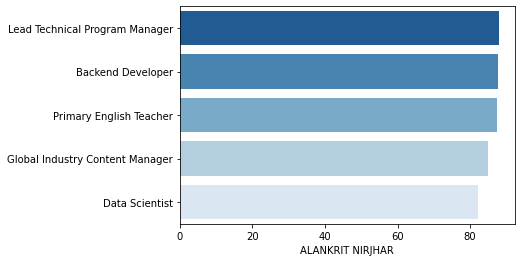

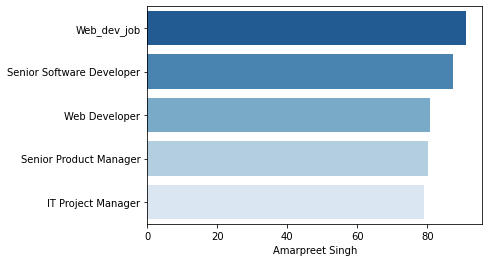

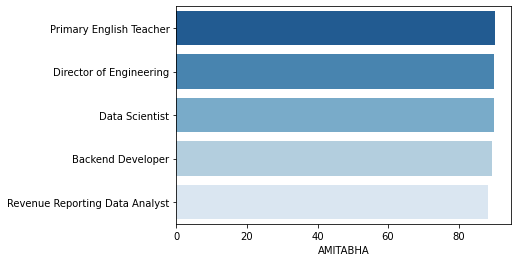

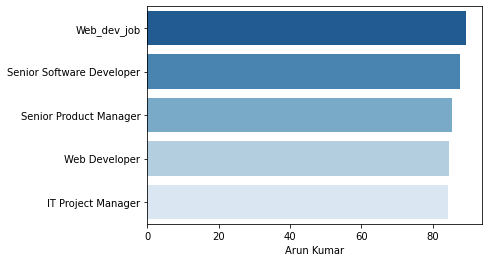

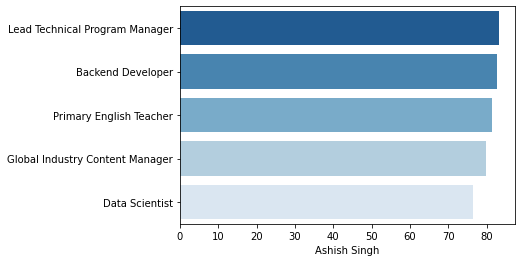

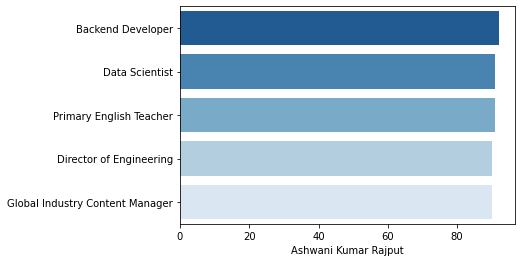

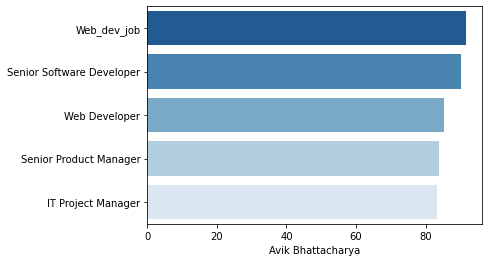

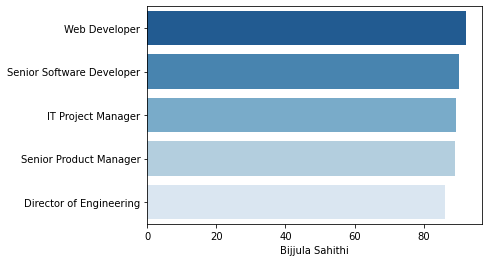

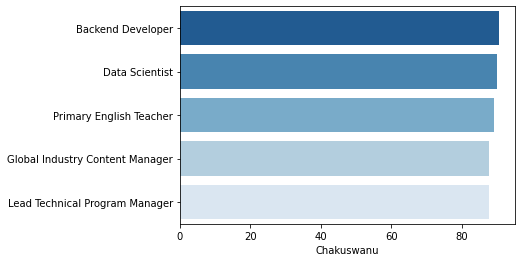

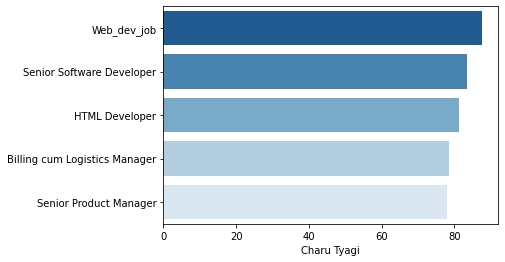

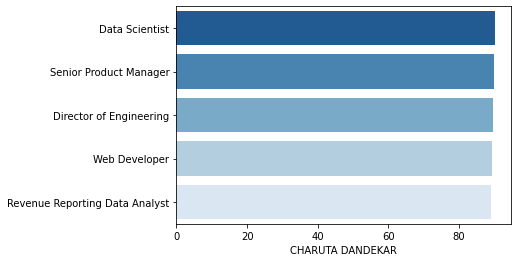

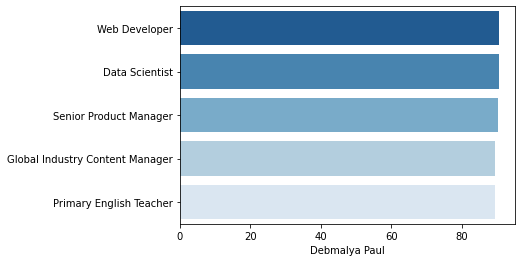

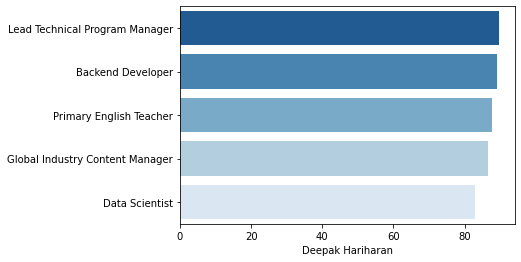

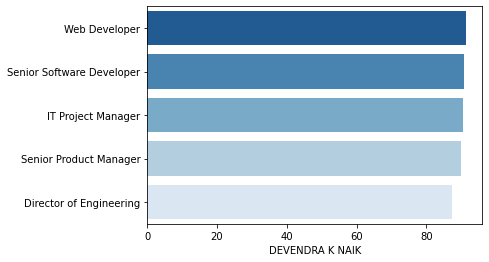

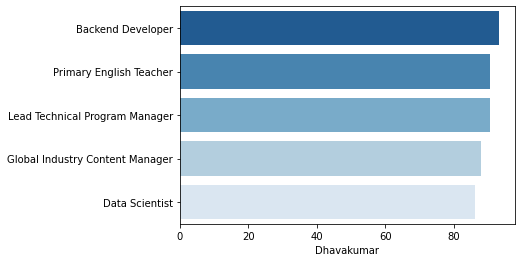

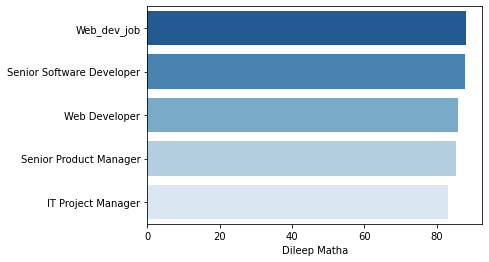

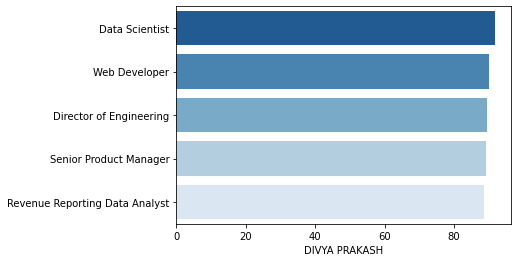

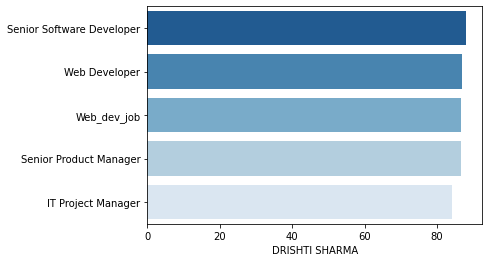

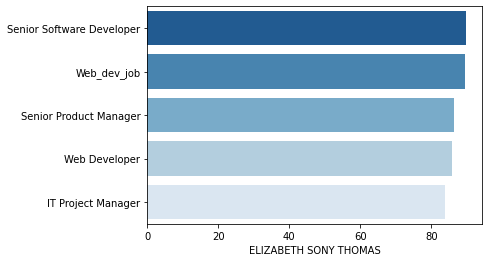

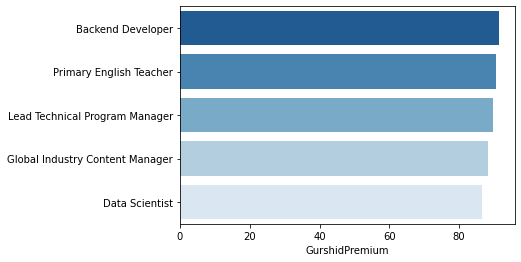

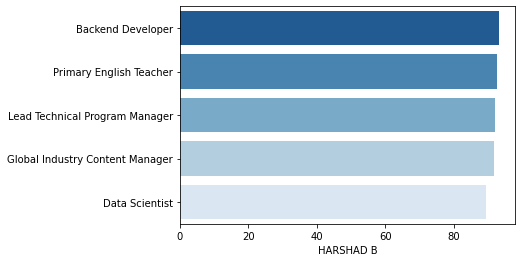

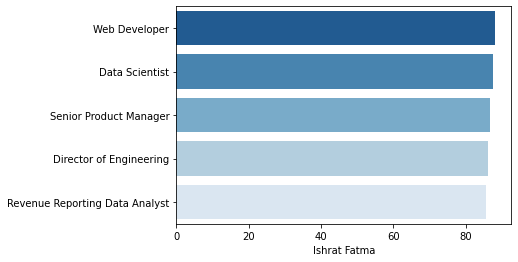

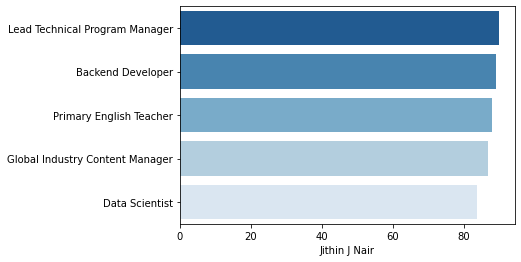

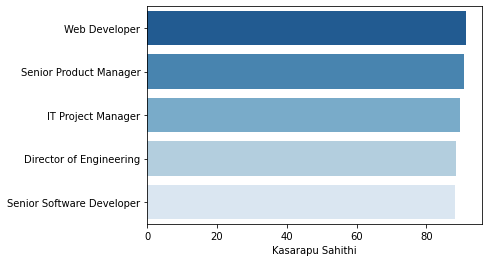

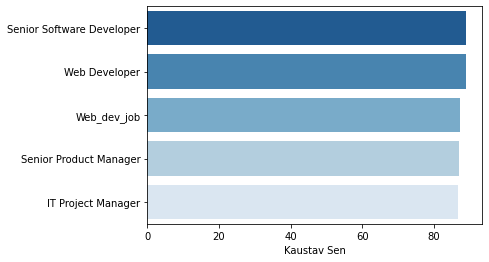

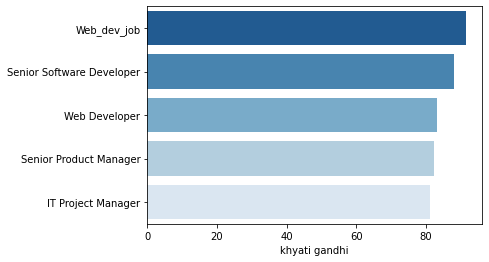

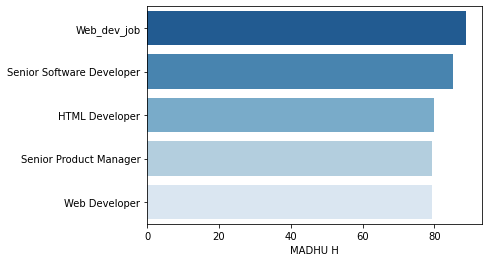

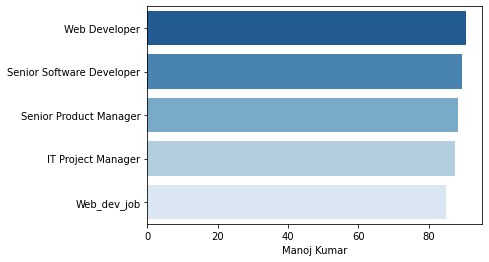

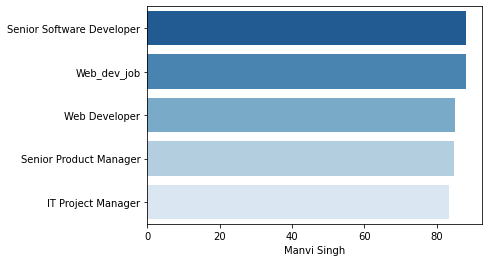

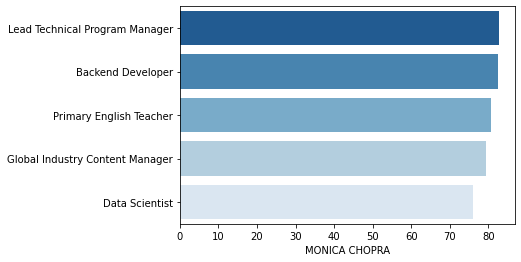

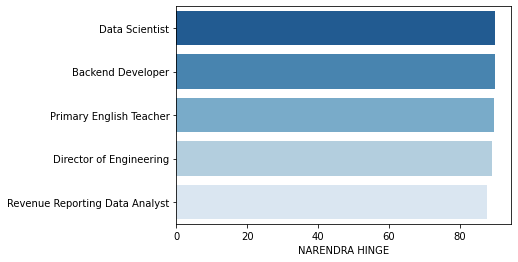

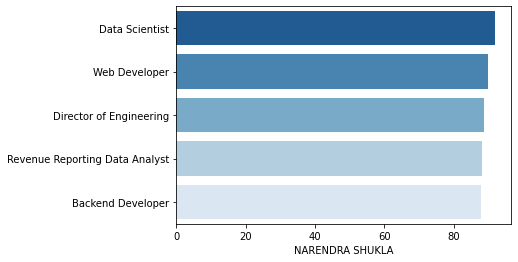

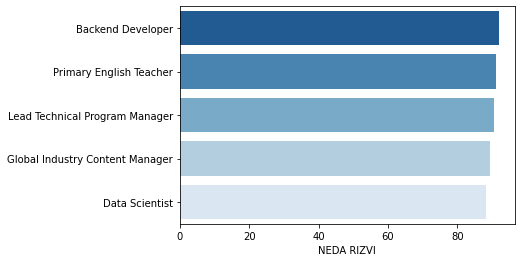

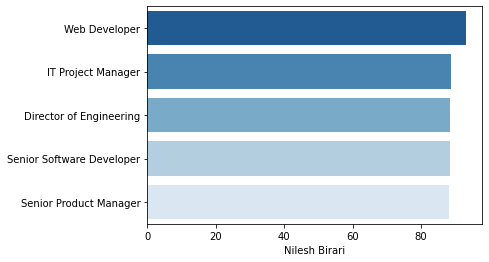

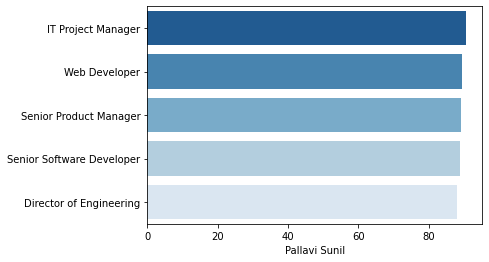

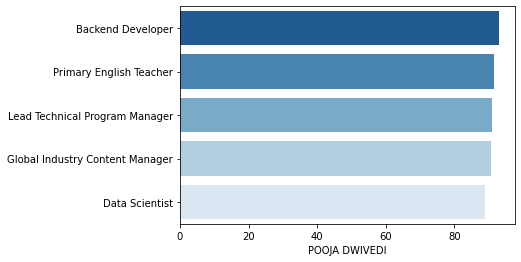

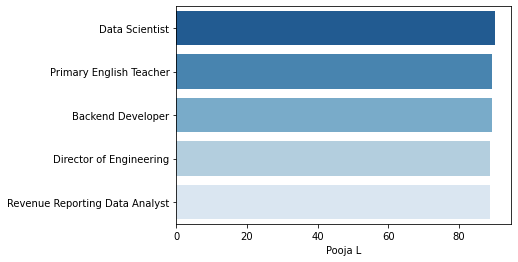

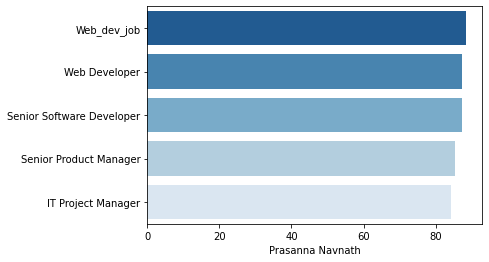

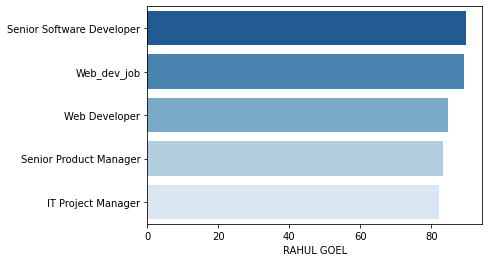

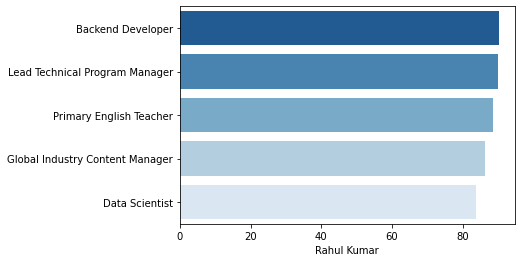

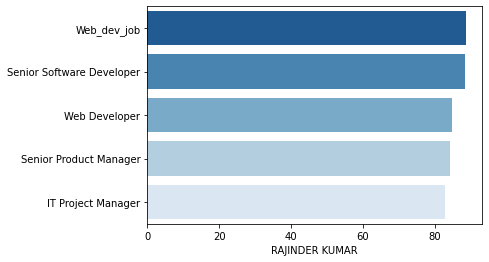

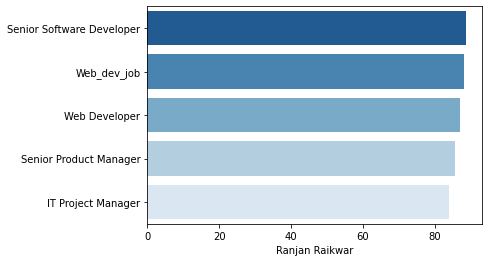

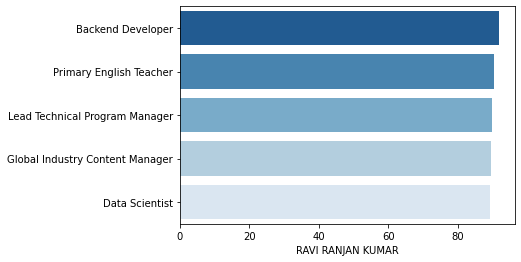

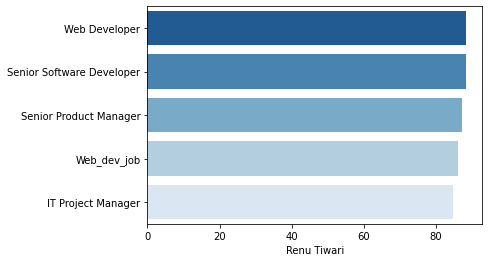

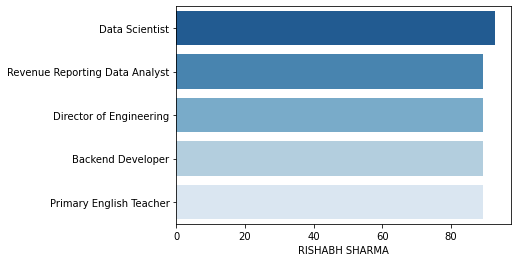

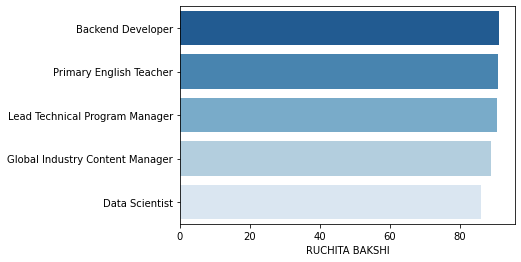

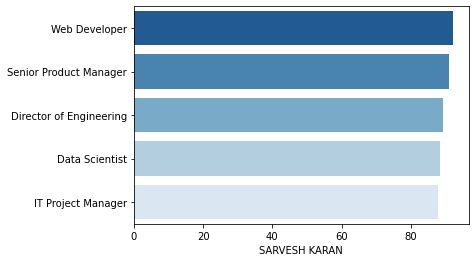

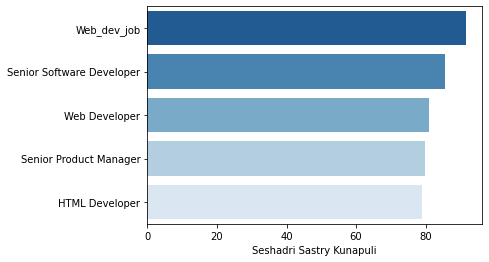

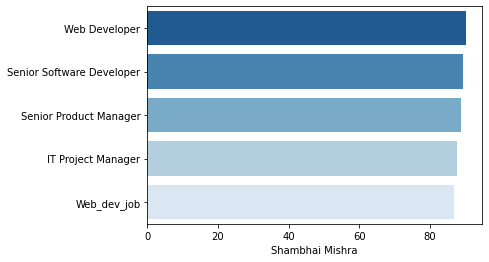

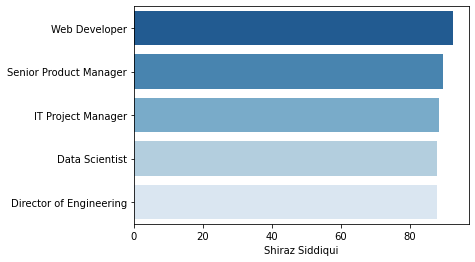

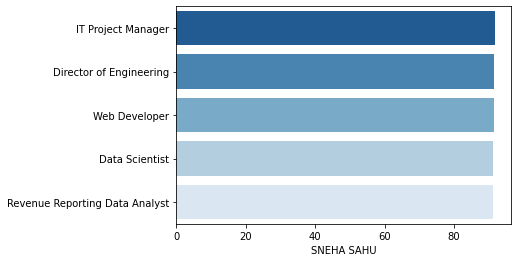

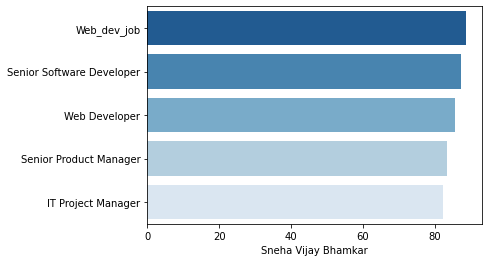

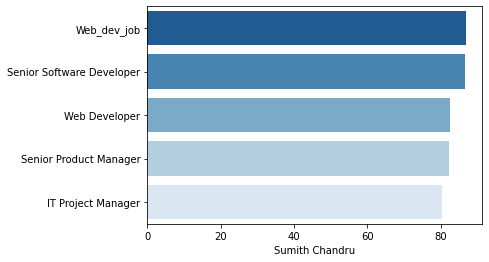

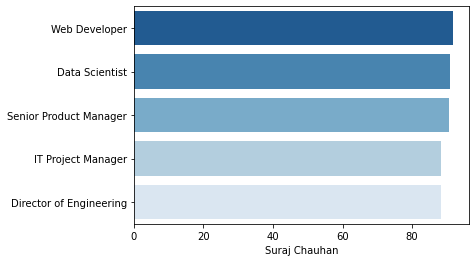

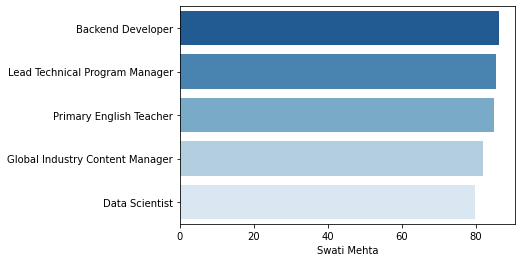

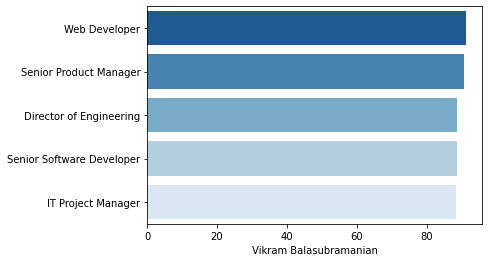

In [26]:
for i in range(60):
    sns.barplot(x=skills[skills.columns[i]], y=roles, palette='Blues_r', order=skills.sort_values(str(skills.columns[i]), ascending=False)[:5].index)
    plt.show()